In [1]:
from pymongo import MongoClient, ASCENDING
import numpy as np
import pandas as pd

In [2]:
client = MongoClient("127.0.0.1", port=27017)
db = client.InFusion
CCVS1 = db.CCVS1
SoundAI = db.SoundAI

In [ ]:
print('Total Record for the collection:')
myquery = { "WheelBasedVehicleSpeed": { "$gt": 40 } }
for i, c in enumerate(CCVS1.find(myquery)):
    continue
print(i)

In [ ]:
df = pd.DataFrame(list(db.CCVS1.find()))
print(df.size)
df["WheelBasedVehicleSpeed"].sort_index().plot(use_index=True)

In [ ]:
df = pd.DataFrame(list(db.Reibung.find()))
print(df.size)
#df["_id"].sort_index().plot()
df["Reibung"].sort_index().plot(use_index=True)

In [ ]:
df = pd.DataFrame(list(db.DD1.find()))
print(df.size)
#df["_id"].sort_index().plot()
df["FuelLevel1"].sort_index(inplace=True)

In [ ]:
df = pd.DataFrame(list(db.HOURS.find().sort([("_id", ASCENDING)])))
print(df.size)
temp = df["_id"][0]
df["_id"].sort_index().plot()
#df["EngTotalHoursOfOperation"].plot()
print(temp)
import time
print(time.gmtime(temp/100000.))
#164398353210328.0
#164422125244121.0

In [56]:
a = db.list_collection_names()
for c in a:
    if "DataFrame" in c:
        db.drop_collection(c)


<AxesSubplot:>

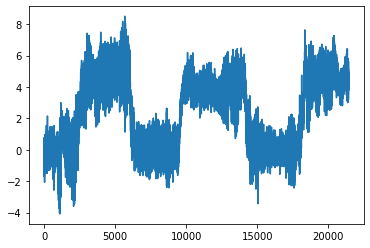

In [5]:
from InFusionTools import convertTime
import pandas as pd
from mongoTools import connectMongoDB

db = connectMongoDB()

t0 = convertTime("Recorder_2021_08_02_08_14_23")
t1 = convertTime("Recorder_2021_08_02_08_30_43")
message = "OMGS"
signal = "OmgS_Y"

df = pd.DataFrame(list(db[message].find({"_id": {"$lt": t1*100000}})))
df[signal].plot()
#df[message].head()

In [ ]:
message = "CCVS1"
df = pd.DataFrame(list(db[message].find().sort([("_id", ASCENDING)])))
df["_id"].plot()

: 